# Data Preparation 
- [7-steps-mastering-data-preparation-python](http://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html?utm_content=buffere0216&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer)
 - Step 1: Preparing for the Preparation
 - Step 2: Exploratory Data Analysis
 - Step 3: Dealing with Missing Values
 - Step 4: Dealing with Outliers
 - Step 5: Dealing with Imbalanced Data
 - Step 6: Data Transformations
 - Step 7: Finishing Touches & Moving Ahead
 
 

In [206]:
import pymysql
import redis

#redis connection
r = redis.StrictRedis(host='172.17.0.2', port=6379, db=0)

#connect maria rdb
db = pymysql.connect(
        host='172.17.0.4',
        user='root',
        passwd='1234',
        db='rental',
        charset='utf8mb4'
    )
#設置cursor
cursor = db.cursor()
#cursor.execute('SELECT * FROM typeID;')

In [207]:
import numpy as np
import pandas as pd
import pandas_profiling

cursor.execute('SELECT ID, cityID, pet, rent, space , lat, lng , label FROM rentInfo;')
df = pd.DataFrame(list(cursor.fetchall()))
cursor.close()
df.columns = ["ID", "cityID", "pet", "rent", "space", "lat", "lng","label"]

In [208]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("/tmp/rentInfo.html")
pfr

Number of variables,8
Number of observations,24799
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,5
Date,0
Text (Unique),0
Rejected,0
Distinct count,24799


# geo lacation
主要是一些因為過期等因素抓取失敗的  
range:lat:[121.29,122.00]  
      lng:[24.68,25.29]  

In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
# sns.distplot(y, hist=True)
# sns.jointplot(x="x", y="y", data=df);

In [210]:
#outline data
print(df.shape)
df = df[df.lng>121]
print(df.shape)
#GeoLocation is ok
print(df[df.lng<122].shape)
print(df[df.lat>24].shape)
print(df[df.lat<26].shape)

(24799, 8)
(24648, 8)
(24648, 8)
(24648, 8)
(24648, 8)


In [211]:
(24799-24648)/24799

0.006088955199806444

# label


In [233]:
df.groupby('label').count().ID

label
NA       48
住      5674
套     18512
雅       414
Name: ID, dtype: int64

In [234]:
df.groupby('label').mean()

,ID,cityID,rent,space
label,,,,
NA,2035.354167,126.291667,117701.833333,97.220000
住,4017.532605,163.162319,453804.678005,38.861650
套,15124.841832,168.095452,26115.447169,21.686859
雅,4869.669082,161.852657,6143.893720,8.745797


# rent and space

In [218]:
df.space.describe()

count     24648
unique     3957
top        0.00
freq       1794
Name: space, dtype: object

In [219]:
df.space = df.space.apply(lambda x: float(x))
df.space.describe()

count    24648.000000
mean        25.570247
std        120.455045
min          0.000000
25%          6.000000
50%         14.795000
75%         36.000000
max      18000.000000
Name: space, dtype: float64

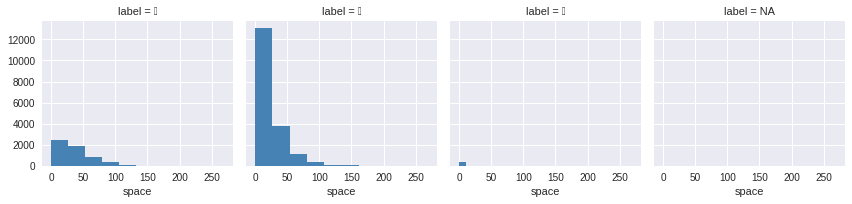

In [232]:
g = sns.FacetGrid(df[df.space<300], col="label", margin_titles=True)
g.map(plt.hist, "space", color="steelblue")

In [180]:
df[df.space<0.1].shape

(1794, 7)

In [191]:
df[df.space<100].space.mean()

22.643800942382413

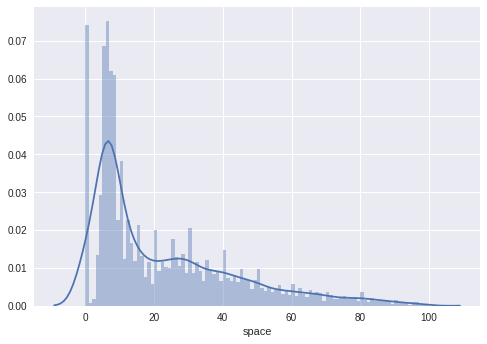

In [197]:
sns.distplot(df[df.space<100].space ,bins=100)

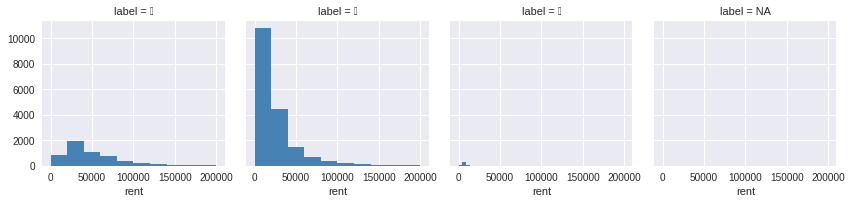

In [214]:
#g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
#bins = np.linspace(0, 60, 13)
#g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)
g = sns.FacetGrid(df[df.rent<200000], col="label", margin_titles=True)
g.map(plt.hist, "rent", color="steelblue")

In [110]:
df['space'] = df['space'].apply(lambda x: x if x > 0.5 else 1.0)

In [111]:
df[df.space==0].shape

(0, 7)

In [124]:
df['rent/space']=df.rent/df.space
print(df['rent/space'].head())
df['rent/space'] = df['rent/space'].apply(lambda x:float(x))

0    401.0266281681103625280718640
1    631.1637080867850098619329389
2    555.9261730042250389148321103
3    714.2857142857142857142857143
4    750.9386733416770963704630788
Name: rent/space, dtype: object


In [156]:
df['rent/space'].describe(percentiles=[.1,.95])

count    2.464800e+04
mean     1.130302e+04
std      4.374105e+05
min      0.000000e+00
10%      6.315789e+02
50%      1.237500e+03
95%      2.500000e+04
max      4.380000e+07
Name: rent/space, dtype: float64

In [129]:
df[df['rent/space']<100].shape

(42, 8)

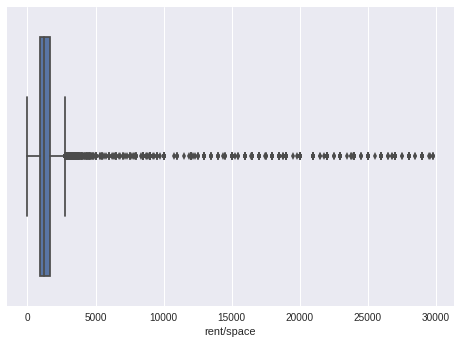

In [157]:
sns.boxplot(x='rent/space', data=df[df['rent/space']<30000] );

In [159]:
print(df[df['rent/space']>30000].rent.min())

30500


In [141]:
df[df['rent/space']>100000].ID

71        72
75        76
2691    2692
2775    2776
3556    3557
3770    3771
3885    3886
3894    3895
3916    3917
3955    3956
3974    3975
4001    4002
4007    4008
4018    4019
4062    4063
4087    4088
4088    4089
4150    4151
4256    4257
4263    4264
4281    4282
4286    4287
4290    4291
4330    4331
4460    4461
4476    4477
4645    4646
4806    4807
4810    4811
4820    4821
        ... 
8019    8020
8020    8021
8021    8022
8022    8023
8023    8024
8024    8025
8025    8026
8115    8116
8127    8128
8128    8129
8129    8130
8130    8131
8131    8132
8132    8133
8133    8134
8134    8135
8135    8136
8250    8251
8251    8252
8252    8253
8275    8276
8276    8277
8277    8278
8278    8279
8299    8300
8305    8306
8416    8417
8529    8530
8530    8531
8531    8532
Name: ID, dtype: int64